# Inicializar

In [1]:
from Modelos.base_model import base_model
from Modelos.serie_model import serie_model
from Modelos.parallel_model import parallel_model
from Modelos.hybrid_model import hybrid_model
from utils.utils import *

from config import *

import math
import numpy as np
import traceback

In [2]:
totalNodes = 6
baseModel = base_model(totalNodes)

Restricted license - for non-production use only - expires 2026-11-23


# Pruebas

## Required Reliabilities

In [3]:
# seriesMinReliability = RELIABILITY_BY_NODE_TYPE[0] ** totalNodes
# seriesMaxReliability = RELIABILITY_BY_NODE_TYPE[2] ** totalNodes
seriesRequiredReliabilities = generate_equidistant_list(0, MAX_RELIABILITY, NUM_EQUIDISTANT_VALUES)

In [4]:
parallelMinReliability = 1 - ((1 - RELIABILITY_BY_NODE_TYPE[0]) ** totalNodes)
parallelMaxReliability = 1 - ((1 - RELIABILITY_BY_NODE_TYPE[2]) ** totalNodes)
parallelRequiredReliabilities = generate_equidistant_list(parallelMinReliability, parallelMaxReliability, NUM_EQUIDISTANT_VALUES)
# parallelRequiredReliabilities = [value for value in parallelRequiredReliabilities if value < 1]

In [5]:
# hybridMaxReliability = RELIABILITY_BY_NODE_TYPE[2] if totalNodes < 6 else 1
hybridRequiredReliabilities = generate_equidistant_list(0.9999, 0.9999999, NUM_EQUIDISTANT_VALUES)

## Serie

In [6]:
# Crear y optimizar el modelo en serie
try:
	seriesMinCost, seriesVars, seriesModel = serie_model(baseModel, totalNodes, 0.6)
	print("Confiabilidad requerida:", seriesRequiredReliabilities[-3])
	mostrarResultadosTabla(totalNodes, seriesMinCost, seriesVars)
	# for var in seriesVars:
	# 	print(f"Variable {var}: {seriesVars[var]}")
except Exception as e:
	print(f"Error: {e}")

Confiabilidad requerida: 0.9702000000000001
Cantidad de Nodos: 6
Resultado de la Optimización:
Costo Total: 386.51
Costo nodos: 348.06
Costo enlaces: 38.45
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         1         0          0
2         1         0          0
3         0         1          0
4         1         0          0
5         0         1          0
6         0         1          0


Gráfica de serie con 6 nodos


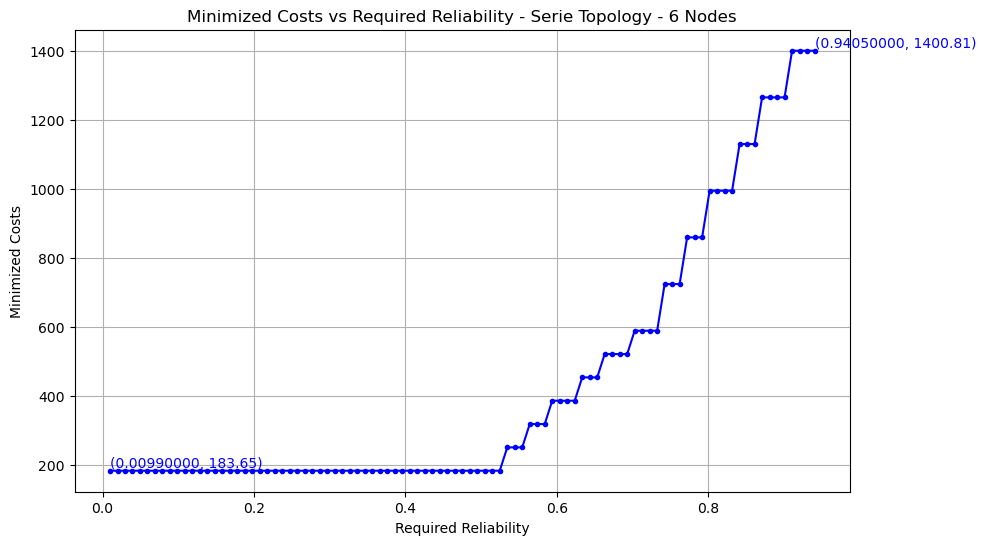

In [7]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
	serieMinimizedCosts = []
	for reqReliability in seriesRequiredReliabilities:
		minCost, seriesVars, seriesModel = serie_model(baseModel, totalNodes, reqReliability)
		serieMinimizedCosts.append(minCost)
	print(f"Gráfica de serie con {totalNodes} nodos")
	graficar_costos_minimizados(seriesRequiredReliabilities, serieMinimizedCosts, "Serie", totalNodes)
except ValueError as e:
	print(f"Error: {e}")

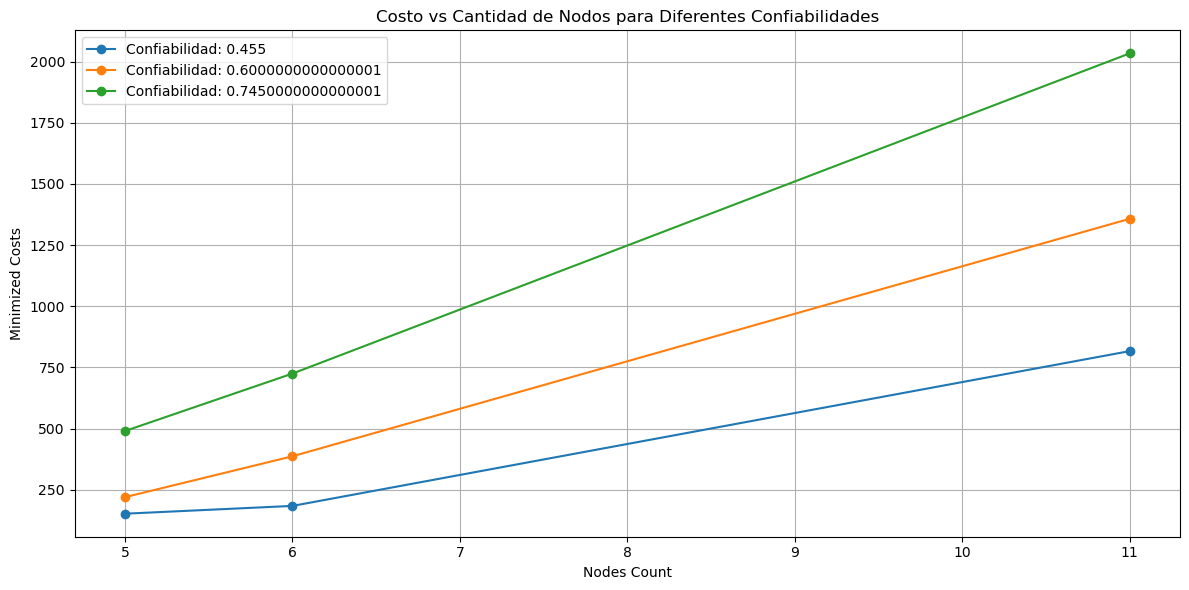

In [8]:
# confiabilidades = [0.31,0.45,0.60,0.75,0.89]
confiabilidades = generate_equidistant_list(0.31, 0.89, 3)

##### entre 0.8 y 0.89
# 0.32 - 0.59: 5 nodos
# 0.26 - 0.53: 6 nodos
# 0.08 - 0.31: 11 nodos

##### entre 0.9 y 0.99
# 0.59 - 0.95: 5 nodos
# 0.53 - 0.94: 6 nodos
# 0.31 - 0.89: 11 nodos

nodos = [5,6,11]

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = serie_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:295: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["low"], label='Low', edgecolor='black', linewidth=0.8),
g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:296: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["medium"], label='Medium', edgecolor='black', linewidth=0.8),
g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:297: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["high"], label='High', edgecolor='black', linewidth=0.8),


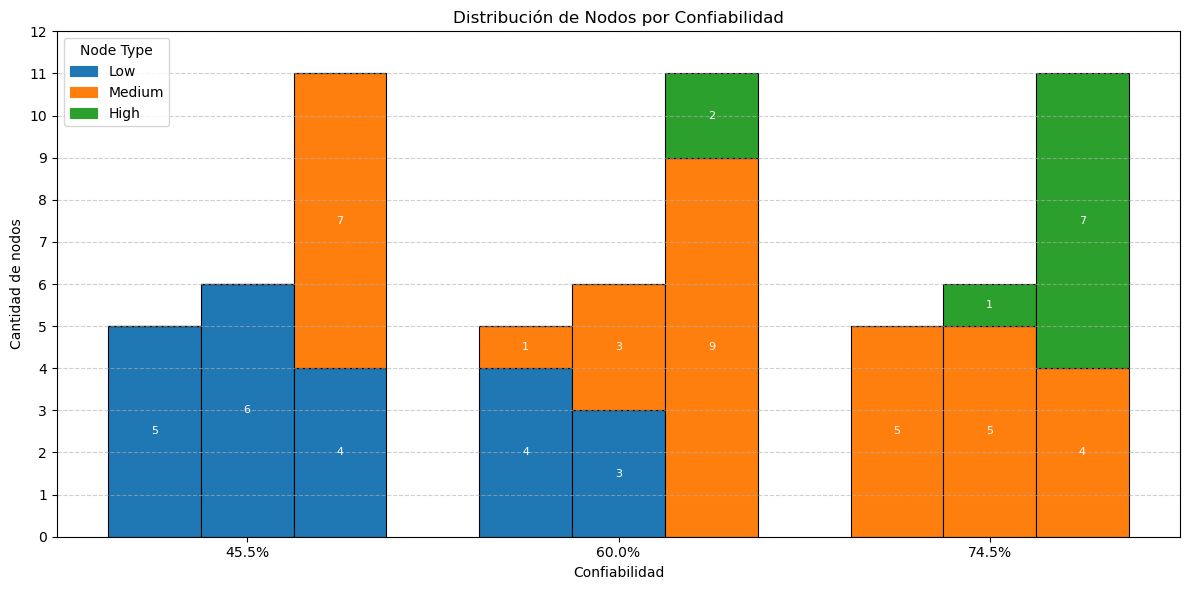

In [9]:
try:
	xValues = []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = serie_model(base_model(n), n, conf)
			valoresX = {}
			for var in seriesVars:
				if var.startswith("x"):
					if seriesVars[var] == 1:
						valoresX[var] = seriesVars[var]
			xValues.append(valoresX)
	graficar_distribucion_apilada(confiabilidades,nodos, xValues)
except ValueError as e:
	print(f"Error: {e}")

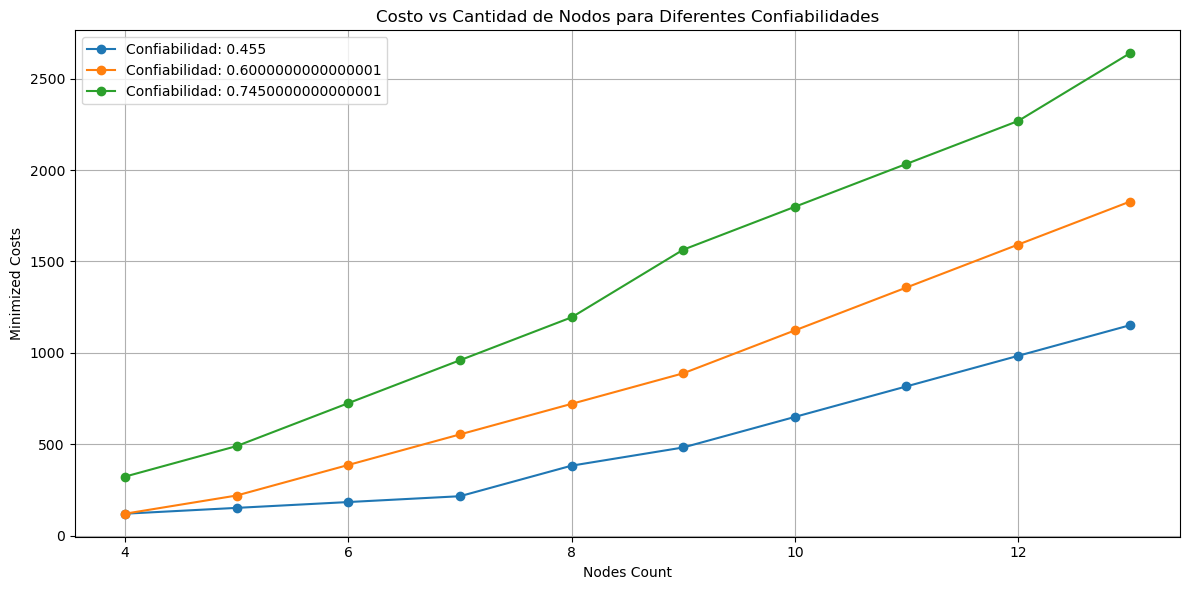

In [10]:
# confiabilidades = [0.31,0.45,0.60,0.75,0.89]
confiabilidades = generate_equidistant_list(0.31, 0.89, 3)

##### entre 0.8 y 0.89
# 0.32 - 0.59: 5 nodos
# 0.26 - 0.53: 6 nodos
# 0.08 - 0.31: 11 nodos

##### entre 0.9 y 0.99
# 0.59 - 0.95: 5 nodos
# 0.53 - 0.94: 6 nodos
# 0.31 - 0.89: 11 nodos

nodos = range(4, 14)

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = serie_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

## Paralelo

In [11]:
# Crear y optimizar el modelo en paralelo
try:
	parallelMinCost, parallelVars, parallelModel = parallel_model(baseModel, totalNodes, parallelRequiredReliabilities[-1])
	print("Confiabilidad requerida: ", parallelRequiredReliabilities[-1])
	mostrarResultadosTabla(totalNodes, parallelMinCost, parallelVars)
except Exception as e:
	print(f"Error: {e}")

Confiabilidad requerida:  0.9999999900980199
Cantidad de Nodos: 6
Resultado de la Optimización:
Costo Total: 733.89
Costo nodos: 618.54
Costo enlaces: 115.35
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         0         1          0
2         0         1          0
3         0         1          0
4         0         1          0
5         0         0          1
6         1         0          0


Gráfica de paralelo con 6 nodos


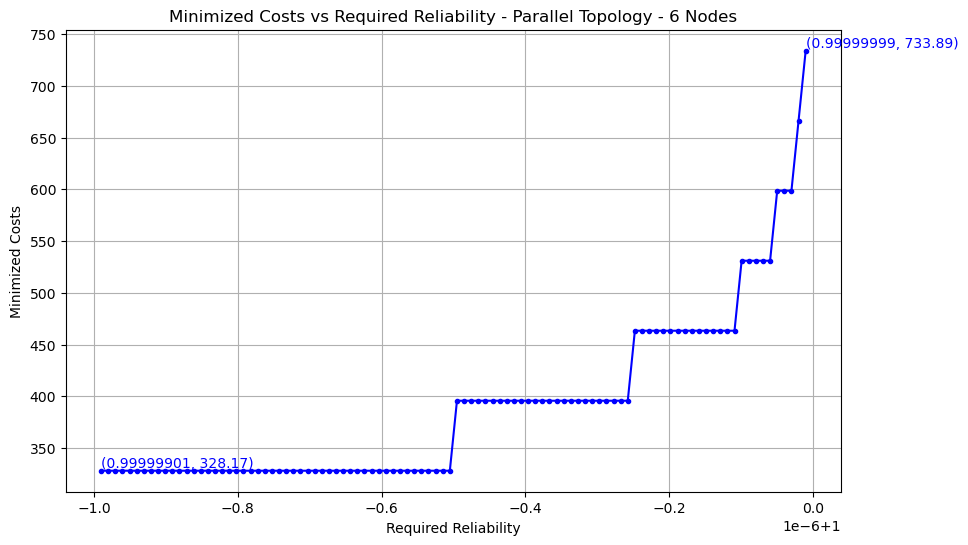

In [12]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
	parallelMinimizedCosts = []
	for reqReliability in parallelRequiredReliabilities:
		minCost, parallelVars, parallelModel = parallel_model(baseModel, totalNodes, reqReliability)
		parallelMinimizedCosts.append(minCost)
	log_transformed_reliabilities = parallelRequiredReliabilities
	# log_transformed_reliabilities = np.log10(np.array(parallelRequiredReliabilities))
	print(f"Gráfica de paralelo con {totalNodes} nodos")
	graficar_costos_minimizados(log_transformed_reliabilities, parallelMinimizedCosts, "Parallel", totalNodes)
except ValueError as e:
	print(f"Error: {e}")

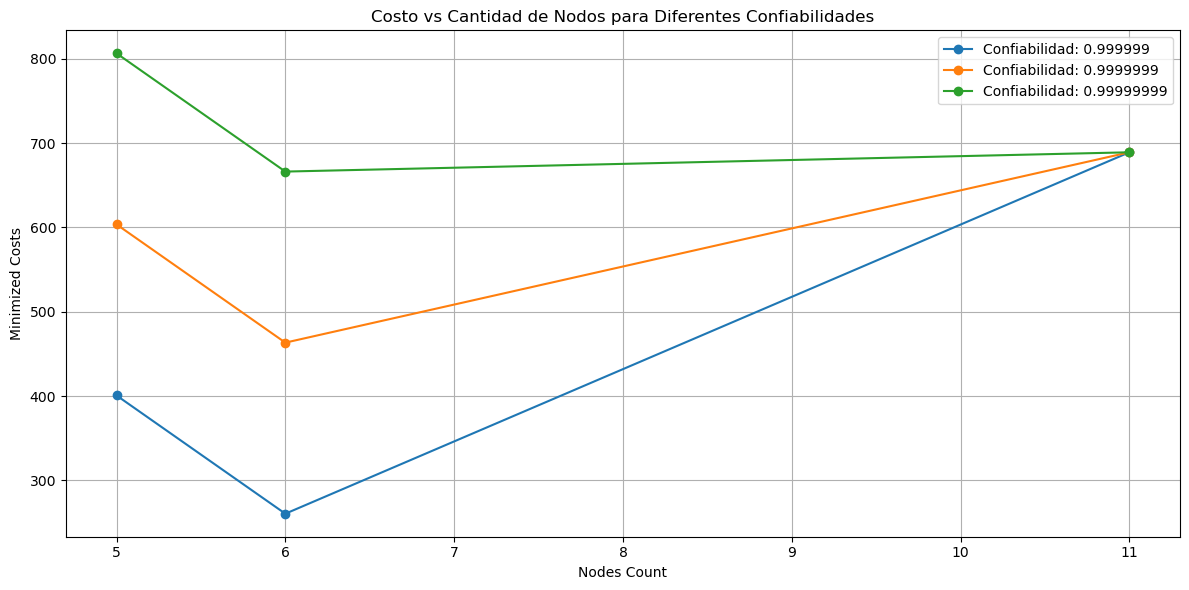

In [13]:
# confiabilidades = [0.999999,0.99999999,0.9999999999]
confiabilidades = [0.999999,0.9999999,0.99999999]

##### entre 0.9 y 0.99
# 0.99999 - 0.9999999999: 5 nodos
# 0.999999 - 0.999999999999: 6 nodos
# 0.99999999999 - 1: 11 nodos

nodos = [5,6,11]

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = parallel_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:295: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["low"], label='Low', edgecolor='black', linewidth=0.8),
g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:296: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["medium"], label='Medium', edgecolor='black', linewidth=0.8),
g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:297: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["high"], label='High', edgecolor='black', linewidth=0.8),


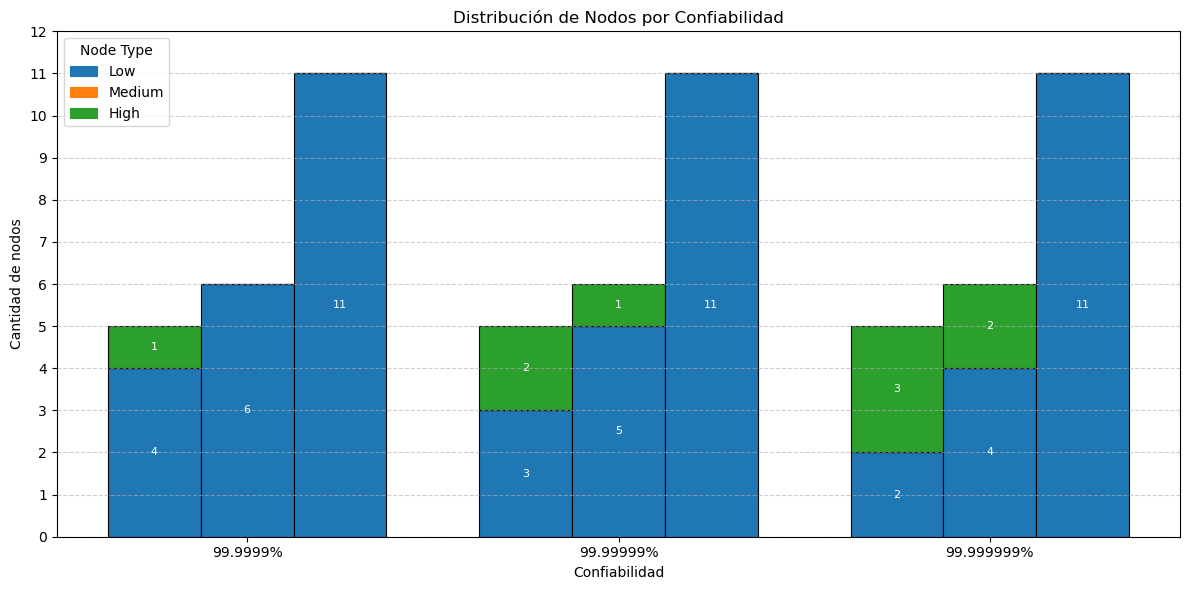

In [14]:
try:
	xValues = []
	for conf in confiabilidades:
		for n in nodos:
			minCost, parallelVars, parallelModel = parallel_model(base_model(n), n, conf)
			valoresX = {}
			for var in parallelVars:
				if var.startswith("x"):
					if parallelVars[var] == 1:
						valoresX[var] = parallelVars[var]
			xValues.append(valoresX)
	graficar_distribucion_apilada(confiabilidades,nodos, xValues)
except ValueError as e:
	print(f"Error: {e}")

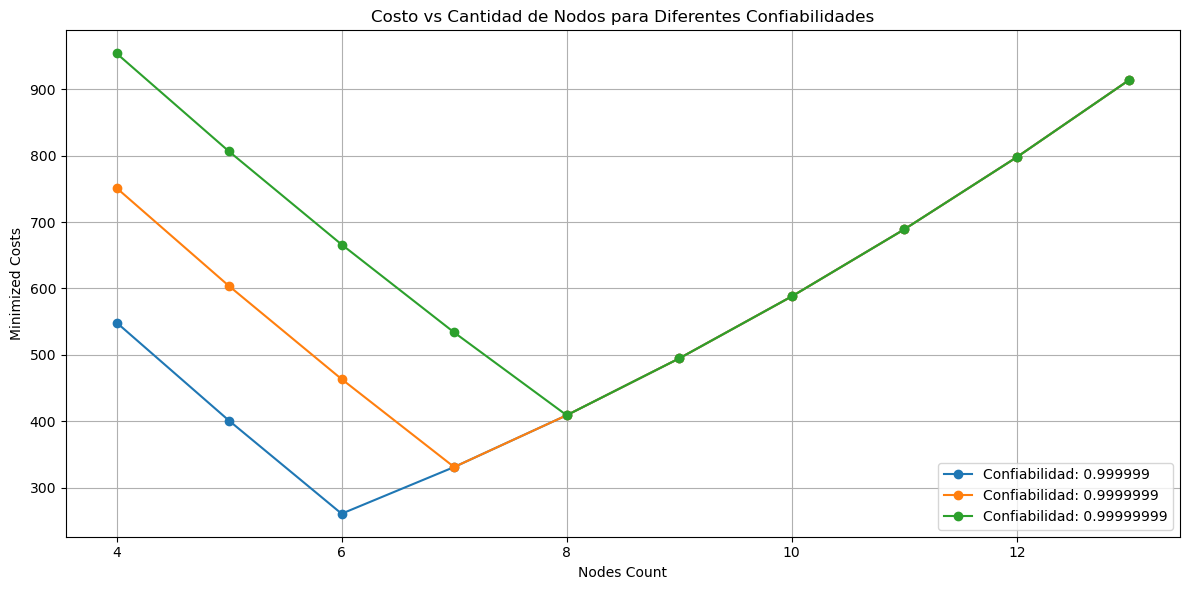

In [15]:
# confiabilidades = [0.999999,0.99999999,0.9999999999]
confiabilidades = [0.999999,0.9999999,0.99999999]

##### entre 0.9 y 0.99
# 0.99999 - 0.9999999999: 5 nodos
# 0.999999 - 0.999999999999: 6 nodos
# 0.99999999999 - 1: 11 nodos

nodos = range(4, 14)

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = parallel_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

## Hibrido

In [16]:
(1-(1-0.99)**5)*(1-(1-0.99)**4)

0.9999999898999999

In [17]:
# Crear y optimizar el modelo híbrido
try:
	# reqRel = hybridRequiredReliabilities[-1]
	reqRel = 0.1
	print("Confiabilidad requerida:", reqRel)
	hybridMinCost, hybridVars, hybridModel = hybrid_model(baseModel, totalNodes, reqRel)
	mostrarResultadosTabla(totalNodes, hybridMinCost, hybridVars, "hibrido")
	confiabilidadAlcanzada = math.exp(hybridVars["TotalReliability"])
	print("Confiabilidad alcanzada:", str(confiabilidadAlcanzada))
	for var in hybridVars:
	    if not var.startswith("x") and not var.startswith("y"):
	        print(f"Variable {var}: {hybridVars[var]}")
except Exception as e:
	print(f"Error: {e}")
	traceback.print_exc()

Confiabilidad requerida: 0.1
Cantidad de Nodos: 6
Resultado de la Optimización:
Costo Total: 199.02999999999997
Costo nodos: 145.2
Costo enlaces: 53.83
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         1         0          0
2         1         0          0
3         1         0          0
4         1         0          0
5         1         0          0
6         1         0          0
Nodos activos (y):
   Subred 0  Subred 1  Subred 2
1         0         0         1
2         0         1         0
3         0         1         0
4         0         0         1
5         0         1         0
6         0         0         1
Confiabilidad alcanzada: 0.998000999999998
Variable nodesCost: 145.2
Variable linksCost: 53.83
Variable activeSubnet[0]: 0.0
Variable activeSubnet[1]: 1.0
Variable activeSubnet[2]: 1.0
Variable nodesBySubnet[0]: -0.0
Variable nodesBySubnet[1]: 3.0
Variable nodesBySubnet[2]: 3.0
Variable parallelSubnetLinks[0]: -0.0
Variable parallelSubnetLinks[1]: 3.0
V

In [18]:
0.9*0.9*0.9*0.9

0.6561000000000001

Gráfica de híbrido con 6 nodos


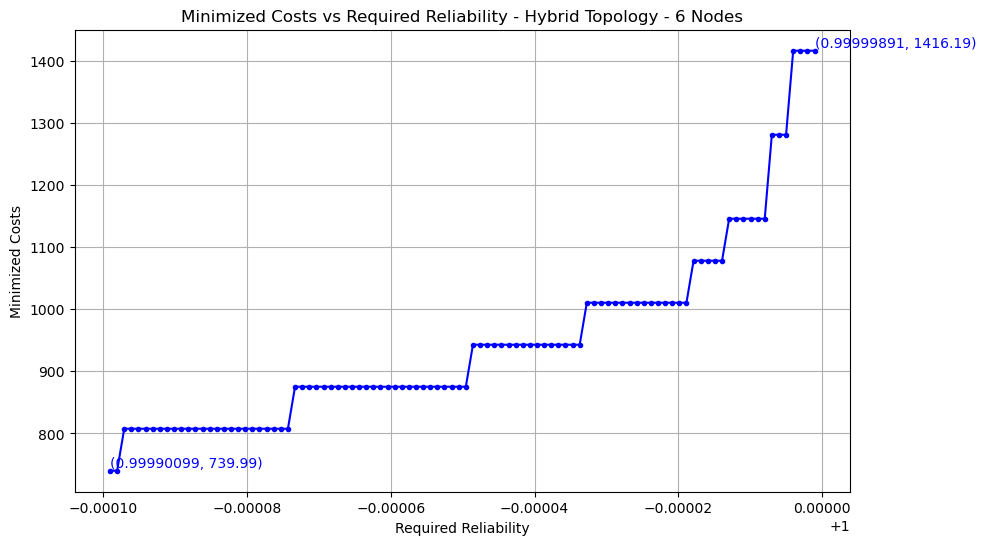

In [19]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
	hybridMinimizedCosts = []
	for reqReliability in hybridRequiredReliabilities:
		minCost, hybridVars, hybridModel = hybrid_model(baseModel, totalNodes, reqReliability)
		hybridMinimizedCosts.append(minCost)
	print(f"Gráfica de híbrido con {totalNodes} nodos")
	graficar_costos_minimizados(hybridRequiredReliabilities, hybridMinimizedCosts, "Hybrid", totalNodes)
except ValueError as e:
	print(f"Error: {e}")

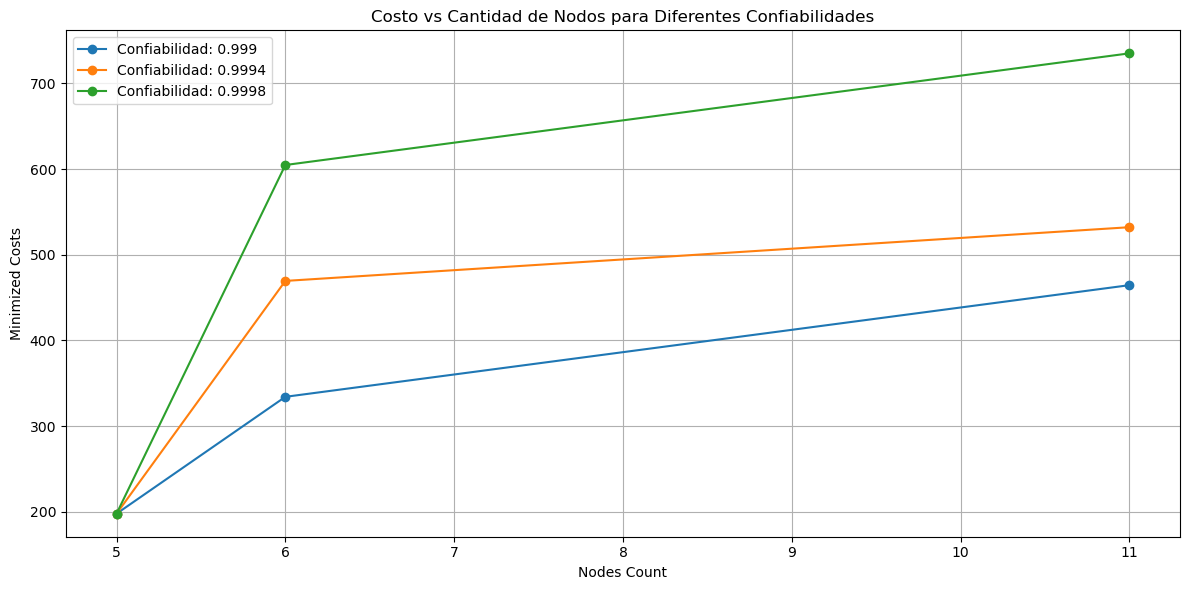

In [20]:
confiabilidades = [0.999,0.9994,0.9998]

nodos = [5,6,11]

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = hybrid_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")

g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:295: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["low"], label='Low', edgecolor='black', linewidth=0.8),
g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:296: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["medium"], label='Medium', edgecolor='black', linewidth=0.8),
g:\My Drive\Tesis\Codigos\optimization_model\utils\utils.py:297: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=colores["high"], label='High', edgecolor='black', linewidth=0.8),


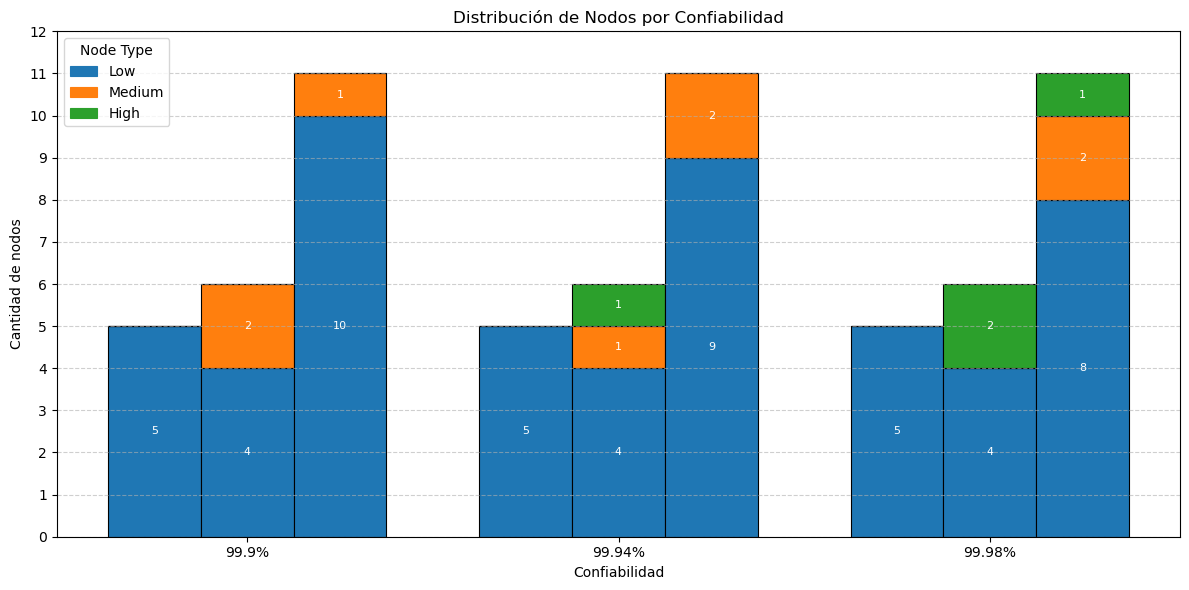

In [21]:
try:
	xValues = []
	for conf in confiabilidades:
		for n in nodos:
			minCost, hybridVars, hybridModel = hybrid_model(base_model(n), n, conf)
			valoresX = {}
			for var in hybridVars:
				if var.startswith("x"):
					if hybridVars[var] == 1:
						valoresX[var] = hybridVars[var]
			xValues.append(valoresX)
	graficar_distribucion_apilada(confiabilidades,nodos, xValues)
except ValueError as e:
	print(f"Error: {e}")

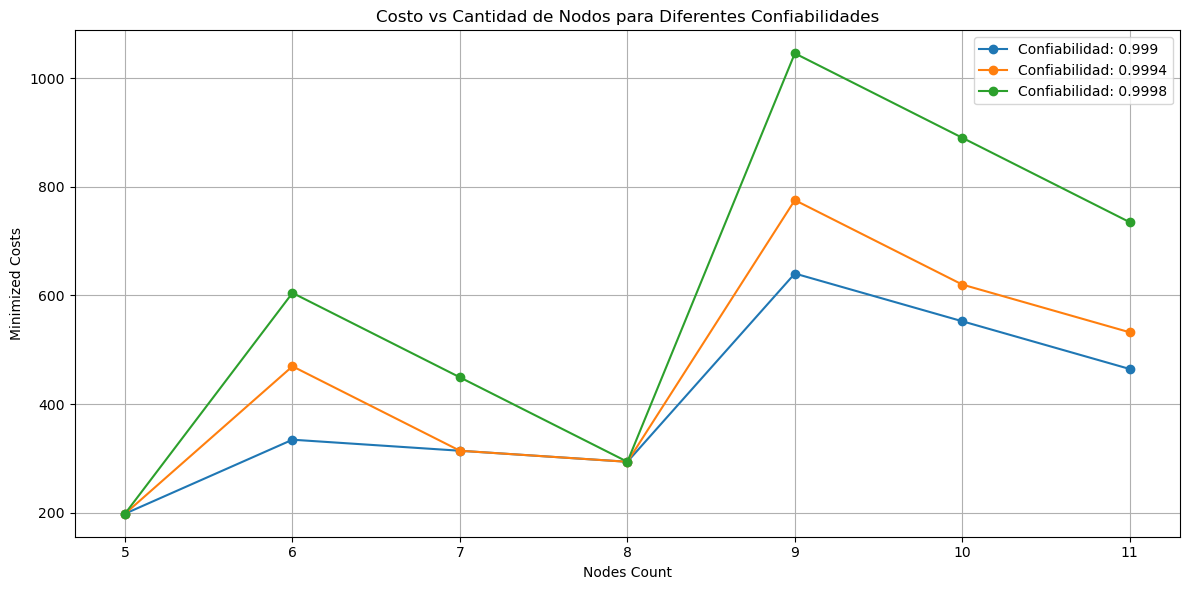

In [22]:
confiabilidades = [0.999,0.9994,0.9998]

nodos = range(5, 12)

try:
	costosTotales= []
	for conf in confiabilidades:
		for n in nodos:
			minCost, seriesVars, seriesModel = hybrid_model(base_model(n), n, conf)
			costosTotales.append(minCost)
	graficar_costos_totales(confiabilidades, nodos, costosTotales)
except ValueError as e:
	print(f"Error: {e}")